# Introduction to Python, Jupyter, and working with audio signals

[return to main page](index.ipynb)

For most of the exercises, we will use the very popular programming language [Python](https://www.python.org) together with a few external libraries from the [Scientific Python Stack](http://scipy.org).
To get started, you might also want to have a look at [Python Introduction](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/intro-python.ipynb).

Note that Python is not the only option for the kind of tasks that we'll tackle here.
If you are interested in some alternatives, have a look at [Julia](http://julialang.org/), [R](http://www.r-project.org/), [Octave](http://octave.org/) or [Matlab](https://www.mathworks.com/products/matlab/).

For installation instructions, see the section [Getting Started](index.ipynb#Getting-Started) on the main page.
To use this very notebook, start the Jupyter Notebook server (which will open a browser window for you) with the command:

    python3 -m notebook

ATTENTION: always make sure to run Python version 3.x and *not* Python 2.x!

## Notebook Cells

This notebook consists of so-called "cells", which can be used for normal text (see above) or for Python code (see below).
*Code cells* can be selected by a mouse click (or with the arrow up/down keys and *Enter*), the code can be edited and then executed by pressing *Shift+Enter* or by clicking the <button class="fa fa-step-forward fa-play icon-play btn btn-xs btn-default"></button> button in the top part of the page.

Don't be shy, try it:

In [52]:
50 - 5 * 4 + 12

42

Code cells can have multiple lines (use *Enter* for line breaks).
When the code cell is executed, all lines are executed, but only the value of the last line is displayed (except if there is no value to display).

Here's another code cell for you to play with:

New cells can be inserted by pressing the *a* or *b* keys (to insert *above* or *below* the current cell) or via the menu. You should also have a look at "Help" -> "Keyboard Shortcuts".

You can step through all cells in the notebook by repeatedly pressing *Shift+Enter*.
Alternatively, you can click "Run All" in the "Cell" menu.

## Importing Modules/Packages

In order to work with numeric arrays (in our case mainly audio signals), we import the [NumPy](http://www.numpy.org) package.

In [53]:
import numpy as np

Now we can use all NumPy functions (by prefixing "`np.`").

In [54]:
np.zeros(10000)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

## Tab Completion

Type "`np.ze`" (without the quotes) and then hit the *Tab* key ...

## Array, Vector, Matrix

Audio signals can be stored in NumPy *arrays*.
Arrays can have arbitrarily many dimensions, but let's use only one-dimensional arrays for now.
Arrays can be created with [numpy.array()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html):

In [55]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Note that the result is not displayed when you assign to a variable (because assignment is a *statement* and not an *expression*).
To show the data, write the variable name separately as the last (or only) line of a code cell.

In [56]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

BTW, there is an easier way to get this particular array (using [numpy.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)):

In [57]:
b = np.arange(10)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Note that the range starts with `0` and ends just before the given stop value!

If you are not used to programming, this might seem strange at first sight, but you'll see that this is vastly superior to starting with `1` and including the stop value.
If you're not convinced yet, have a look at [what E. W. Dijkstra has to say](http://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html).

Another, slightly different method to create a sequence of evenly spaced numbers is [numpy.linspace()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).

In [58]:
np.linspace(0, 6, 7)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])

If the number of elements is known and the step size should be obtained automatically $\Rightarrow$ `np.linspace()`  
If the step size is known an if it's an integer and the number of elements should be obtained automatically $\Rightarrow$ `np.arange()`

## Getting Help

If you want to know details about the usage of `np.arange()` and all its supported arguments, have a look at its help text. Just append a question mark to the function name (without parentheses!):

In [59]:
np.arange?

A help window should open in the lower part of the browser window.
This window can be closed by hitting the *q* key (like "quit").

Let's get some more help:

In [60]:
np.zeros?

You can also get help for the whole NumPy package:

In [61]:
np?

You can get help for any object by appending (or prepending) a question mark to the name of the object.
Let's check what the help system can tell us about our variable `a`:

In [62]:
a?

## Creating a Sine Tone

Now let's create our first audio signal, shall we?

Let's generate a signal using the equation $y(t) = A\sin(\omega t)$ with $\omega = 2\pi f$ and $f$ being the frequency of the sine tone.
The maximum signal amplitude is given by $A$.
The variable $t$ obviously represents time.
Let's create a digital signal with evenly spaced values for $t$.

We can use the function [numpy.sin()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) to create a sine tone. Let's look at its help text first.

In [63]:
np.sin?

Now that we know which function to call, we need appropriate input.
And that's where our sequences of evenly spaced values from above come into play.

The nice thing about NumPy functions like `np.sin()` is that they can operate on whole arrays at once, so it is not necessary to call the function on each single value separately.
Therefore, we can store the whole range of values for our time variable $t$ in one array.

According to the equation, each value of $t$ has to be multiplied with (the constant) $\omega$.
That's another nice thing about NumPy: we don't have to multiply every value of the array $t$ separately with $\omega$, we can multiply the whole array with a scalar at once, and NumPy does the element-wise multiplication for us.
This is called ["broadcasting"](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), in case you stumble upon that word in the docs.
The array returned by `np.sin()` can (again using broadcasting) be multiplied by the constant scalar $A$ to get the final result.

The only thing that's still missing is $\pi$, but that's simple:

In [64]:
np.pi

3.141592653589793

We create a sine tone with a frequency of 500 Hz, a duration of 1 second and an amplitude of 0.3.
Use a sampling rate of 44.1 kHz.
 The first value of $t$ should be 0.

In [65]:
dur = 1  # duration in seconds
amp = 0.3  # maximum amplitude
freq = 500  # frequency of the sine tone in Hertz
fs = 44100  # sampling frequency in Hertz
t = np.arange(int(np.ceil(dur * fs))) / fs
y = amp * np.sin(2 * np.pi * freq * t)

We can check the length in samples of the generated tone with the [built-in len() function](https://docs.python.org/3/library/functions.html#len).

In [66]:
len(y)

44100

## Plotting

Python and NumPy cannot plot by themselves, they need some help from [matplotlib](http://matplotlib.org/).

In [67]:
import matplotlib.pyplot as plt

Now we can plot the data from our array:

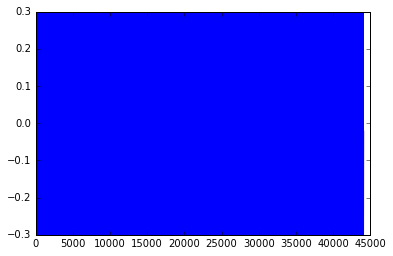

In [68]:
plt.plot(y)

The peculiar thing about `matplotlib` is that it doesn't actually show the plot!

But it's in there somewhere ... we just have to use `plt.show()` to reveal it:

In [69]:
plt.show()

Now the plot window should be visible.
Check out [all those fancy buttons](http://matplotlib.org/users/navigation_toolbar.html)!

Note that while the plot window is open, we cannot use any of the code cells in our notebook.
You have to close the plot window to be able to continue.
This is annoying.
As is typing `plt.show()` all the time.

That's why the Jupyter notebook provides this special (a.k.a. "magic") command:

In [70]:
%matplotlib inline

After that, you don't have to use `plt.show()` anymore, and the plot is directly integrated into the notebook.

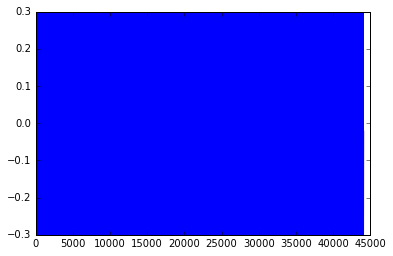

In [71]:
plt.plot(y)

Nice, isn't it?

There is still something ugly going on:
The plotting functions return some strange object(s) which we don't need (for now).
Those can be ignored by appending a semicolon to the last statement of a code cell (is has no effect after any other statement):

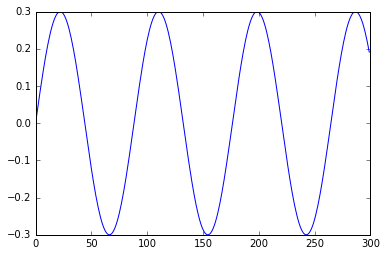

In [72]:
plt.plot(y[:300]);

## Tweaking the Plot

Let's look again at our plot and add meaningful labels to the axes.

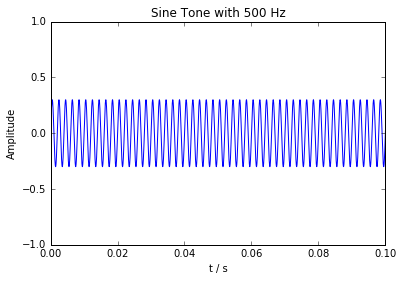

In [73]:
plt.plot(t, y);
plt.xlim(0,0.1)
plt.ylim(-1,1)
plt.xlabel("t / s")
plt.ylabel("Amplitude")
plt.title("Sine Tone with {} Hz".format(freq));

## Listening to the Signal

Python cannot play audio on its own, but there are several external libraries available for that.
We'll be using [python-sounddevice](http://python-sounddevice.rtfd.org/), some other libraries are shown at [this overview page](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/playback-recording/index.ipynb).

To install the `sounddevice` module, just follow its installation instructions.
In many cases, it'll boil down to:

    python3 -m pip install sounddevice --user

Note: After the installation, you should restart any running IPython kernels (e.g. using the menu "Kernel" $\to$ "Restart"), otherwise they won't know about the newly installed Python module.
After restarting, you can use the menu option "Cell" $\to$ "Run All Above" to re-evaluate everything you've written above.

Once the library is installed, you can use it like this:

In [23]:
import sounddevice as sd

WARNING: You should turn the volume down, just to be sure not to destroy your loudspeakers/headphones/ears.

In [29]:
sd.play(y, fs)

If you hear no sound, it might be that you have to select your sound device first. Have a look at your available devices and select one first:

In [25]:
sd.query_devices()

   0 HDA Intel MID: ALC662 rev1 Analog (hw:0,0), ALSA (2 in, 2 out)
   1 HDA Intel MID: ALC662 rev1 Digital (hw:0,1), ALSA (0 in, 2 out)
   2 HDA Intel MID: ALC662 rev1 Alt Analog (hw:0,2), ALSA (2 in, 0 out)
   3 EDIROL UA-25EX: USB Audio (hw:1,0), ALSA (2 in, 2 out)
   4 sysdefault, ALSA (128 in, 128 out)
   5 front, ALSA (0 in, 2 out)
   6 surround40, ALSA (0 in, 2 out)
   7 surround51, ALSA (0 in, 2 out)
   8 surround71, ALSA (0 in, 2 out)
   9 iec958, ALSA (0 in, 2 out)
  10 spdif, ALSA (0 in, 2 out)
* 11 default, ALSA (128 in, 128 out)
  12 dmix, ALSA (0 in, 2 out)
  13 /dev/dsp, OSS (16 in, 16 out)
  14 /dev/dsp1, OSS (16 in, 16 out)

In [26]:
sd.default.device = 'EDIROL UA-25EX'
sd.query_devices()

   0 HDA Intel MID: ALC662 rev1 Analog (hw:0,0), ALSA (2 in, 2 out)
   1 HDA Intel MID: ALC662 rev1 Digital (hw:0,1), ALSA (0 in, 2 out)
   2 HDA Intel MID: ALC662 rev1 Alt Analog (hw:0,2), ALSA (2 in, 0 out)
*  3 EDIROL UA-25EX: USB Audio (hw:1,0), ALSA (2 in, 2 out)
   4 sysdefault, ALSA (128 in, 128 out)
   5 front, ALSA (0 in, 2 out)
   6 surround40, ALSA (0 in, 2 out)
   7 surround51, ALSA (0 in, 2 out)
   8 surround71, ALSA (0 in, 2 out)
   9 iec958, ALSA (0 in, 2 out)
  10 spdif, ALSA (0 in, 2 out)
  11 default, ALSA (128 in, 128 out)
  12 dmix, ALSA (0 in, 2 out)
  13 /dev/dsp, OSS (16 in, 16 out)
  14 /dev/dsp1, OSS (16 in, 16 out)

In [30]:
sd.play(y, fs)

If you just play back a signal it might be that you here clicks, due to discontinuities at the beginning and/or end of the signal. In order to avoid those you have to fade in/out. One method to do this is provided in the file [tools.py](tools.py):

In [39]:
import tools

def myplay(data):
    """Apply fade in/out and play with 44.1 kHz."""
    data = tools.fade(data, 2000, 5000)
    sd.play(data, 44100)

Now let's try if that works:

In [32]:
myplay(y)

## Writing the Signal to a File

It's possible to write WAV files with the [wave module](https://docs.python.org/3/library/wave.html) from Python's standard library.
Since this is [quite complicated](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/audio-files/audio-files-with-wave.ipynb#Writing), we'll use the more convenient external library [PySoundFile](https://github.com/bastibe/PySoundFile/).
Of course there are also alternatives; have a look at [this overview page](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/audio-files/index.ipynb).

Have a look at [the documentation](http://pysoundfile.readthedocs.org/) for how to install PySoundFile.
If you have [pip](https://pip.pypa.io/en/stable/installing.html) and the library [libsndfile](http://www.mega-nerd.com/libsndfile/) already installed, it should be enough to run this command in a terminal:

    python3 -m pip install PySoundFile --user

Again, you will have to restart the IPython kernel (e.g. using the menu "Kernel" $\to$ "Restart") to be able to import the newly installed Python module.
Afterwards, you might want to use the menu command "Cell" $\to$ "Run All Above" to re-create your signal.

Once installed, you can use it like this:

In [33]:
import soundfile as sf

In [34]:
sf.write('my_first_signal.wav', y, fs)

Note that the sampling rate has to be passed to be stored within the file.

## Signal Processing with the *SciPy* Library

The name "SciPy" stands for two slightly different things:

* The [*Scientific Python Ecosystem*](http://scipy.org/), consisting of [NumPy](http://numpy.scipy.org/), [matplotlib](http://matplotlib.org/), [Jupyter](http://jupyter.org/)/[IPython](http://ipython.org/), the [SciPy library](http://scipy.org/scipylib/) and many more libraries and tools.

* The [SciPy library](http://docs.scipy.org/doc/scipy/reference/tutorial/general.html), which in turn is part of the *Scientific Python Ecosystem*.

We were using the former already, now let's use the latter:

In [35]:
from scipy import signal

This imports SciPy's [signal processing module](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html).

Unlike "`import numpy as np`" we *never* import the whole `scipy` namespace.
The SciPy package is a collection of [many sub-packages and sub-modules](http://docs.scipy.org/doc/scipy/reference/); we only import those that we need.

You should *always* use one of those forms:

    from scipy import foobar
    import scipy.foobar as foo
    from scipy.foobar import foofun

... and *never* one of those:

<pre style="color:gray">
import scipy
from scipy import foofun
</pre>

... where `foobar` is the name of a sub-package/sub-module and `foofun` is the name of a function.

Now we can use the function [signal.chirp()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html) to create a linear sine sweep with an initial frequency of 100 Hz, a final frequency of 5000 Hz, with a length of 2 seconds and with an amplitude of 0.3.

In [42]:
f0, f1 = 100, 5000  # Hz
amp = 0.3
dur = 2  # seconds
fs = 44100 # Hz
t = np.arange(int(np.ceil(dur * fs))) / fs
sweep = amp * signal.chirp(t, f0, dur, f1, 'linear')
myplay(sweep)

We can also create a logarithmic sweep.

In [43]:
sweep = amp * signal.chirp(t, f0, dur, f1, 'log')
myplay(sweep)

## Superposition of Signals

No let us create more complex signals by the superposition of two different once, in this case we will first generate a sine tone and noise using the [numpy.random.normal()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) function. After that we add them together and listen to them:

In [44]:
f = 500 # Hz
amp = 0.3
dur = 1.5 # seconds
fs = 44100 # Hz
t = np.arange(int(np.ceil(dur * fs))) / fs
sinetone = amp * np.sin(2 * np.pi * freq * t)
noise = np.random.normal(scale=0.1, size=len(sinetone))
sine_plus_noise = sinetone + noise
myplay(sine_plus_noise)

## More Than One Channel $\to$ Two-Dimensional Arrays

Up to now, we were only using audio signals with a single channel.
Those could be easily stored in a one-dimensional NumPy array.

To store more than one channel, we can use a two-dimensional array.
Two-dimensional arrays somewhat look like lists of lists, but internally, they are still stored in one contiguous area of memory.

More than one channel is interesting as it allows us to use more than one loudspeaker for reproduction. Try the following example with your headphones:

In [49]:
dichotic_sig = np.column_stack([sinetone, noise])
myplay(dichotic_sig)

NOTE: the first column is always the left channel if you are using a headphone. Let's try it the other way around then:

In [50]:
myplay(np.column_stack([noise,sinetone]))

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>